In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import math
import xgboost as xgb
import matplotlib.pyplot as plt

In [2]:
#df_contratos =pd.read_csv('Matriz_contratos.txt', delimiter = '\t') 

In [3]:
#df_CUI_contratos =pd.read_csv('Matriz_relacion_CUI_contratos.csv', delimiter = ',') 

In [22]:
df= pd.read_csv('Matriz_infobra_unicos.txt', delimiter = '|')

In [85]:
df_cluster = pd.read_csv('Cluster.txt', delimiter = '|')

In [23]:
df = df[~df.isin([np.nan, np.inf, -np.inf]) ].copy()
df.fillna(0, inplace = True)

In [24]:
df.loc[~df['COPA_DESCRI'].isin(['Adm. Directa','Por Contrata']),'COPA_DESCRI'] = 'Otros'

In [25]:
df.loc[df['RUBRO'].isin(['ENERGÍA Y MINAS','ORDEN PÚBLICO/DEFENSA Y SEGURIDAD','PROTECCIÓN/READAPTACIÓN SOCIAL','SALUD']),'RUBRO'] = 'Otros'

In [26]:
df = df[df.CDPT_DPTO.isin(('CUSCO','PIURA','LAMBAYEQUE','LORETO','LIMA'))].copy()

In [27]:
df = pd.get_dummies(data=df, columns=['CDPT_DPTO','COPA_DESCRI','RUBRO','TIPO_FORMATO'])

In [28]:
df.head()

,NOBR_ID,COBR_DESCRI,CODCONSUCODE,COBR_DIRECCION,NOBR_TIPEJE,CODCONSUCODE_DESCRI,COBR_NOMBRERESIDENTE,COBR_DNIRESIDENTE,DOBR_FEC_INI_OBRA,NOBR_CODSNIP,...,RUBRO_AGRICULTURA,RUBRO_EDUCACIÓN/CULTURA,RUBRO_OTRAS INFRAESTRUCTURAS,RUBRO_Otros,RUBRO_TRANSPORTES Y COMUNICACIONES,"RUBRO_VIVIENDA, CONSTRUCCIÓN Y SANEAMIENTO",TIPO_FORMATO_0,TIPO_FORMATO_FUR,TIPO_FORMATO_IOARR,TIPO_FORMATO_PROYECTO DE INVERSION
0,47664,CONTRATACIÓN DE LA FIRMA CONTRATISTA QUE EJECU...,661,El Tramo I del proyecto se inicia en Bellavist...,202,MTC-PROYECTO ESPECIAL DE INFRAESTRUCTURA DE TR...,AUGUSTO ALEJANDRO. LLUEN FLORES,D.N.I: 06261463,/Date(1511499600000)/,396,...,0,0,0,0,1,0,0,0,0,1
1,159977,CONSTRUCCION DE DISPOSITIVO DE CONTROL DE TRAN...,4382,MARGEN IZQUIERDO DEL RIO CORRIENTES,207,FONDO DE COOPERACION PARA EL DESARROLLO SOCIAL,0,0,/Date(1636952400000)/,2506945,...,0,0,0,0,1,0,0,0,1,0
2,13,CONSTRUCCIÓN Y EQUIPAMIENTO DEL LOCAL PARA SED...,282,"Calle dos de mayo N°1067 , esquina con Calle A...",202,MINISTERIO DEL INTERIOR - PNP UE 001 OGA,ROSENDO DEL CARMEN. VASQUEZ TALAVERA,D.N.I: 10614586,/Date(1335243600000)/,3316,...,0,0,0,0,0,1,0,0,0,1
3,40887,"MEJORAMIENTO DEL CEPM N° 64194 CONTAMANA, PROV...",4445,CONTAMANA,202,GOBIERNO REGIONAL DE LORETO - GERENCIA SUB REG...,0,0,/Date(1445922000000)/,7034,...,0,0,1,0,0,0,0,0,0,1
4,41295,REMODELACION Y EQUIPAMIENTO DEL PUESTO DE SALU...,5345,SANTA TERESA - RIO YAVARI,202,GOBIERNO REGIONAL DE LORETO SEDE CENTRAL,ROGER AUGUSTO. RODRIGUEZ GUERRA,D.N.I: 01110455,/Date(1401858000000)/,1445,...,0,0,0,1,0,0,0,0,0,1


In [29]:
base = df.loc[:,df.dtypes != 'object']

In [30]:
exc =['NOBR_ID','CODCONSUCODE','NOBR_TIPEJE','NOBR_CODSNIP','CODIGO_UNICO',
     'COD_UNIDAD_UEI','COD_SNIP','COD_TIPO_INVERSION','ID_PROYECTO','CDST_CODIGO','CDPT_CD_DPTO',
     'BENEFICIARIO','DIFF_FECHA_INI_EJE_ET','DIFF_FECHA_NOW_ET', 'DIFF_FECHA_NOW_INI_EJE']

In [31]:
var_montos = ['Monto actualizado S/_count', 'Monto actualizado S/_min','Monto actualizado S/_max','DIFF_MONTO', 'DIFF_PORC_MONTO']

In [32]:
base.columns

Index(['NOBR_ID', 'CODCONSUCODE', 'NOBR_TIPEJE', 'NOBR_CODSNIP',
       'NSNP_MONTOVERI', 'NSNP_MONTOAPR', 'CODIGO_UNICO', 'UNIDAD_OPMI',
       'PIM_ANO_VIGENTE', 'DEV_ANO_VIGENTE', 'DEV_ACUMULADO', 'COD_UNIDAD_UEI',
       'COSTO_ACTUALIZADO', 'MTO_VIABLE', 'CERTIFICADO_ANO_ACTUAL',
       'GIRADO_ANO_ACTUAL', 'COMPROMETIDO_ANO_ACTUAL', 'MTO_PMI_1',
       'MTO_PMI_2', 'MTO_PMI_3', 'MTO_PMI_4', 'MTO_CartFza', 'COD_SNIP',
       'BENEFICIARIO', 'COD_TIPO_INVERSION', 'ID_PROYECTO', 'DIFF_MONTO',
       'DIFF_PORC_MONTO', 'DIFF_FECHA_INI_EJE_ET', 'DIFF_FECHA_NOW_ET',
       'DIFF_FECHA_NOW_INI_EJE', 'NCOR_LONGIT', 'NCOR_LATITU', 'NCOR_LONGI2',
       'NCOR_LATIT2', 'CDPT_CD_DPTO', 'CDST_CODIGO', 'DOBA_FCHREP_count',
       'NOBA_FISICO_PRO_min', 'NOBA_FISICO_PRO_max', 'NOBA_FISICO_REA_min',
       'NOBA_FISICO_REA_max', 'NOBA_VALZDO_PRO_min', 'NOBA_VALZDO_PRO_max',
       'NOBA_VALZDO_REA_min', 'NOBA_VALZDO_REA_max',
       'Monto actualizado S/_count', 'Monto actualizado S/_min',
     

In [33]:
st_x = StandardScaler()

In [35]:
X = base.drop(var_montos +exc , axis = 1) 
y = base.DIFF_PORC_MONTO 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 0)

In [37]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', eval_metric = 'mae' ,colsample_bytree = 0.9, learning_rate = 0.05,
                max_depth = 2, alpha = 10, n_estimators = 1000)

In [38]:
xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_train)
y_pred_test = xg_reg.predict(X_test)

In [ ]:
#regr = linear_model.LinearRegression()
#regr.fit(X_train, y_train)
#y_pred = regr.predict(X_train)

#y_pred_test = regr.predict(X_test)

In [39]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = math.sqrt(mse)

print(mae) , print(rmse)

0.33428129424740416
15.58814517525947


(None, None)

In [40]:
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
rmse = math.sqrt(mse)

print(mae) , print(rmse)

0.07921231557235786
0.28609514066449376


(None, None)

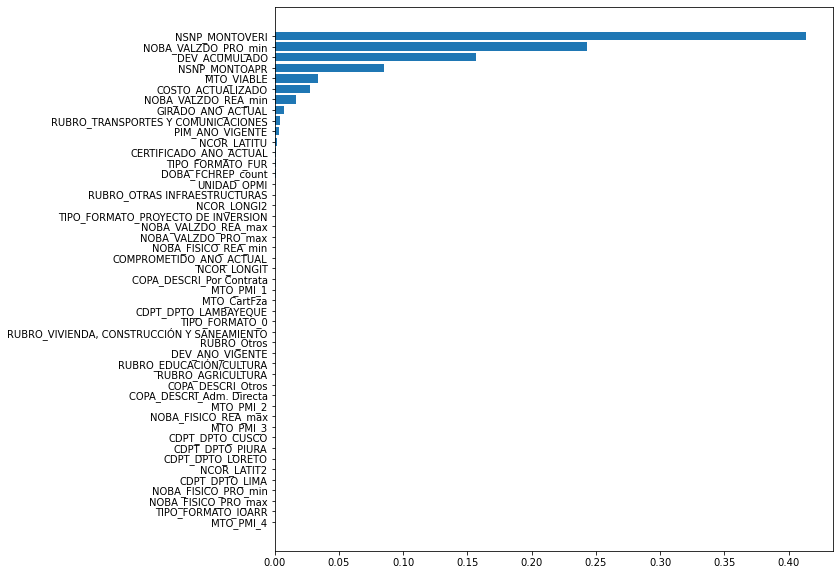

In [41]:
sorted_idx = xg_reg.feature_importances_.argsort()

plt.figure(figsize=(10,10))

plt.barh(X_train.columns[sorted_idx], xg_reg.feature_importances_[sorted_idx],)


plt.show()

In [44]:
y_tot = xg_reg.predict(X)

In [ ]:
df[['CDPT_DPTO', 'CPRV_PROV', 'CDST_DISTRIT']]

In [87]:
df['Estimacion_DIFF_PORC_MONTO'] = y_tot

In [88]:
df[['CODIGO_UNICO','Estimacion_DIFF_PORC_MONTO']]

,CODIGO_UNICO,Estimacion_DIFF_PORC_MONTO
0,2192666,0.285904
1,2506945,-0.015085
2,2015456,0.109591
3,2016888,0.319125
4,2017024,0.891466
...,...,...
15087,2153632,0.124850
15088,2059625,0.118186
15089,2197067,0.119193
15090,2157027,0.091973


In [95]:
df_f = pd.merge(df,df_cluster[['CODIGO_UNICO','cluster']], on ='CODIGO_UNICO', how = 'left')

In [96]:
df.shape, df_f.shape

((15061, 109), (15061, 110))

In [115]:
df_f[['CODIGO_UNICO','DIFF_PORC_MONTO','Estimacion_DIFF_PORC_MONTO','cluster']].to_csv('Regresion_cluster.csv', index =None)